# Trabajo Práctico RNA - 1C 2019: Prediciendo enfermedad cardiaca en individuos

El objetivo del trabajo práctico es determinar en base a datos de entrenamiento, si nuevos individuos (samples) son propensos a sufrir enfermedades cardiacas.

## Inspeccionemos el dataset

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Separamos las features con la variable a predecir

In [2]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values

# Veamos la distribución de las variables

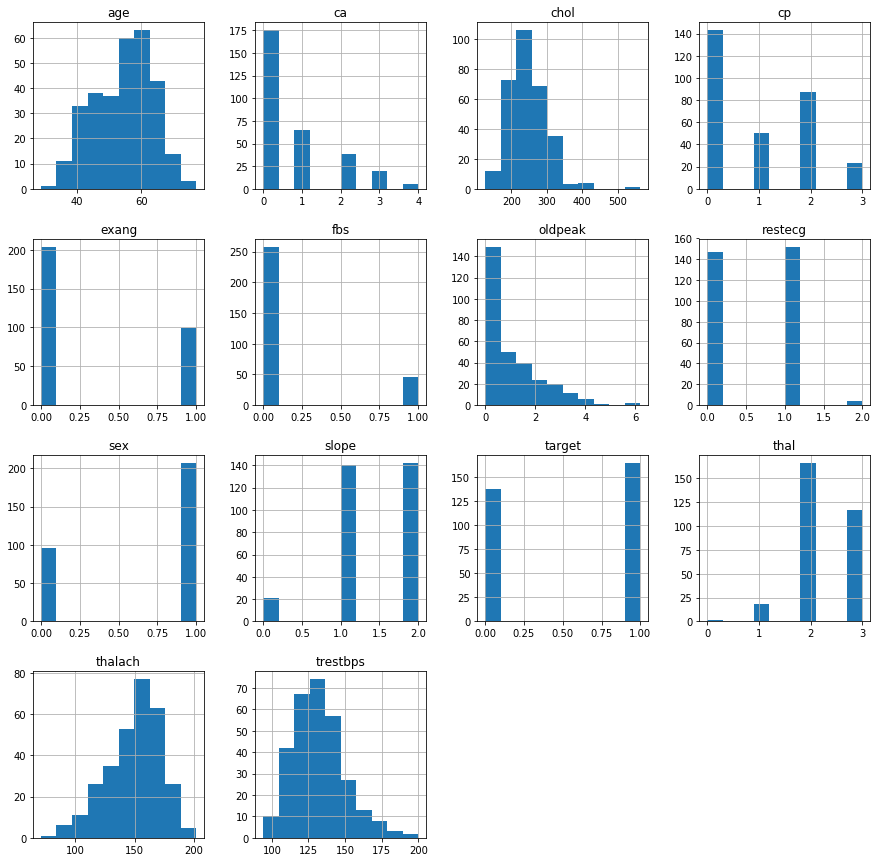

In [4]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,15))
plt.show()

Dividamos el dataset en un set de entrenamiento y otro para pruebas. Hagamos un 20% para pruebas.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Procesemos un poco el dataset. Hagamos que la media de cada feature sea 0 y su desviación estándar 1. Esto sirve mucho para algoritmos de machine learning en general.

In [6]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test) 

### Ahora la parte divertida!
## Generemos el modelo y alimentemoslo con los datos de entrenamiento

In [7]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Probemos diferentes configuraciones de redes neuronales. Vayamos de 1 hidden layer con 3 neuronas a 5 capas con 6 neuronas cada una. Serían 5 x 4 combinaciones

In [8]:
mlp_accuracies_df = pd.DataFrame(columns=['neurons', 'layers', 'score'])

for layers in range(1,5+1):
    for neurons in range(3,6+1):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(neurons, layers), random_state=1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        mlp_accuracies_df = mlp_accuracies_df.append({'neurons': neurons, 'layers': layers, 'score': accuracy}, ignore_index=True)

In [9]:
mlp_accuracies_df.sort_values(by='score', ascending=False)

,neurons,layers,score
6,5.0,2.0,0.868852
10,5.0,3.0,0.836066
12,3.0,4.0,0.836066
19,6.0,5.0,0.836066
8,3.0,3.0,0.819672
9,4.0,3.0,0.819672
14,5.0,4.0,0.819672
16,3.0,5.0,0.819672
5,4.0,2.0,0.803279
7,6.0,2.0,0.803279


In [10]:
clf

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Podemos ver los atributos que maneja la clase de Multi-Layer Perceptron Classifier.
Posee un learning_rate de 1e-5 (alpha) y usa como función de activación la ReLU.

En este caso, podemos ver que comparando el `accuracy scoring` (acertados/total) que la configuración de 2 capas escondidas con 5 neuronas cada una (`hidden_layer_sizes`) es la más óptima para este dataset.

### Veamos qué tan bien va el modelo con los datos de prueba

In [11]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [12]:
cm

array([[25,  2],
       [ 6, 28]])

![Descripción de matriz de confusión](https://cdn-images-1.medium.com/max/1600/1*g5zpskPaxO8uSl0OWT4NTQ.png)

# Conclusiones

Podemos ver en la variable `cm` la matriz de confusión. Acertamos a 25 negativos y 28 positivos (ya que en nuestro caso, los indices son 0 para "no tiene enfermedad cardiaca" y 1 para "posee enfermedad cardiaca").

También podemos ver que nuestro mejor scoring de precisión es del 86.89%. Es relativamente bueno teniendo en cuenta que poseemos un dataset relativamente chico de 242 ejemplos.
